Start


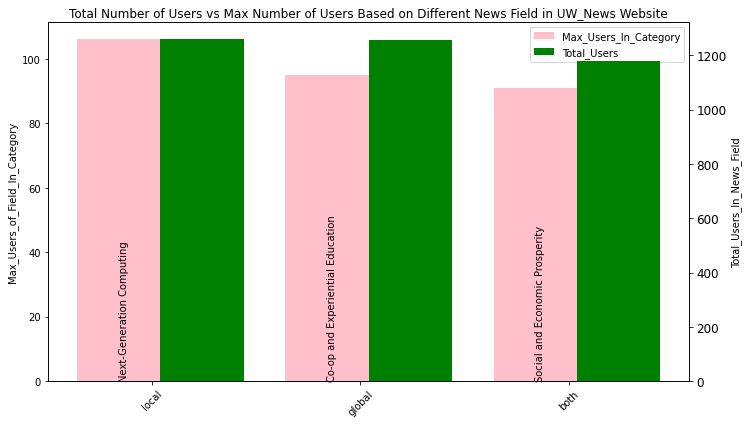

End


In [96]:
import matplotlib.pyplot as plt
import pandas as pd
import mariadb
import sys
import time
import numpy as np


def mariadb_select_all():
    # Connect to MariaDB Platform
    try:
        conn = mariadb.connect(
            user="drupal",
            password="drupal",
            host="172.18.0.7",
            port=3306,
            database="drupal"
        )
    except mariadb.Error as e:
        print(f"Error connecting to MariaDB Platform: {e}")
        sys.exit(1)

    time.sleep(10)
    cursor = conn.cursor()
    sql = """ SELECT news_fields, category_label, MAX(user)AS max_user_in_category, SUM(user)AS total_user_in_field, t4.sources
FROM (SELECT entity_id, delta, field_are_you_interested_mostly__value as news_fields, COUNT(*) AS user, category_label
    FROM user__field_are_you_interested_mostly_ 
    INNER JOIN (SELECT entity_id, delta, category_label FROM user__field_uw_news_categories) AS t2
    USING(entity_id, delta)
    GROUP BY category_label, news_fields
    ORDER BY user DESC) AS t3
LEFT JOIN (SELECT entity_id, delta, field_sources_value AS sources FROM user__field_sources)AS t4
ON t3.entity_id = t4.entity_id AND t3.delta = t4.delta
GROUP BY news_fields
ORDER BY total_user_in_field DESC;"""

    cursor.execute(sql)
    result = cursor.fetchall()

    df = pd.DataFrame(list(result),columns=["news_field","category_label","max_user_in_category","total_user_in_field", "sources" ]) 

    x = df.max_user_in_category
    y = df.total_user_in_field
    z = df.news_field
    w = df.category_label
    ind = np.arange(len(z))
    

    fig = plt.figure(figsize=(10.5,6), tight_layout=True) # Create matplotlib figure

    ax = fig.add_subplot(1,1,1) # Create matplotlib axes
    ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
    width = 0.4
    
    plt.title("Total Number of Users vs Max Number of Users Based on Different News Field in UW_News Website", fontsize="12")
    s1= ax.bar(ind, x, width=width, color='pink', align='center')
    s2 = ax2.bar(ind+width, y, width=width, color='green', align='center')
    ax.set_ylabel('Max_Users_of_Field_In_Category')
    ax2.set_ylabel('Total_Users_In_News_Field')
    plt.xticks(ind+width*width, z, rotation='vertical')
    plt.tick_params(axis='both',which='major',labelsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.legend( (s1[0], s2[0]),('Max_Users_In_Category','Total_Users'))
    ax.bar_label(s2,padding=3)
    
    for x,y in enumerate(w):
        plt.text(x,0.6,str(y),rotation='vertical',verticalalignment='bottom')
    
    
    plt.savefig('test1.png')
   
    plt.show()

print("Start")

mariadb_select_all()

print("End")



Start


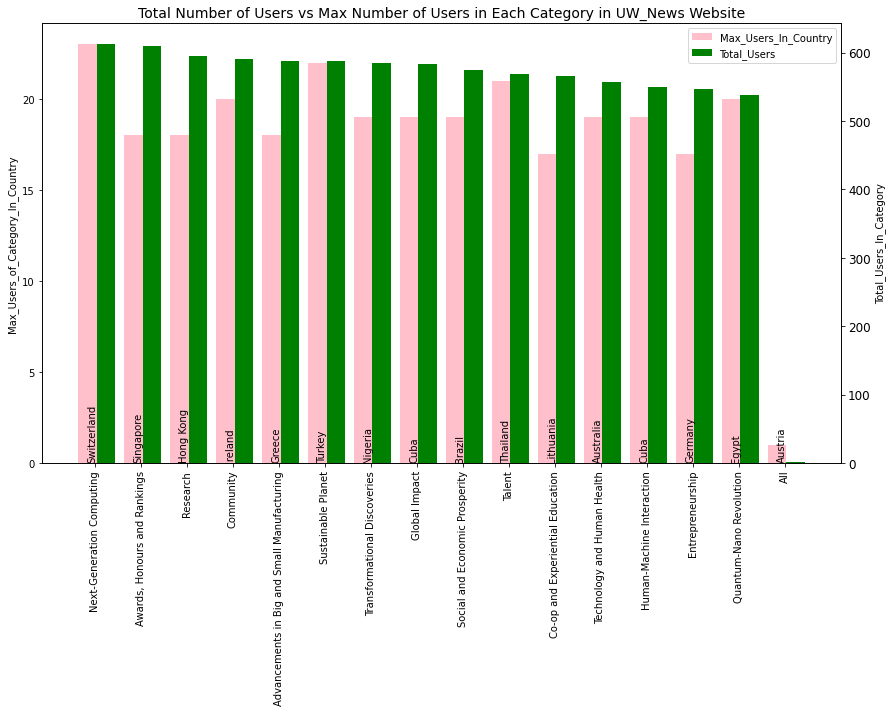

End


In [87]:
import matplotlib.pyplot as plt
import pandas as pd
import mariadb
import sys
import time
import numpy as np


def mariadb_select_all():
    # Connect to MariaDB Platform
    try:
        conn = mariadb.connect(
            user="drupal",
            password="drupal",
            host="172.18.0.7",
            port=3306,
            database="drupal"
        )
    except mariadb.Error as e:
        print(f"Error connecting to MariaDB Platform: {e}")
        sys.exit(1)

    time.sleep(10)
    cursor = conn.cursor()
    sql = """ SELECT category_label, SUM(user)AS total_user_in_category, MAX(user)AS max_user_in_category,countries AS max_user_in_country, t2.language
FROM (SELECT entity_id, delta, category_label, countries,count(*) as user
    FROM user__field_uw_news_categories
    INNER JOIN user__field_countries
    USING(entity_id,delta)
    GROUP BY category_label,countries
    ORDER BY user DESC) as t1
LEFT JOIN (SELECT entity_id, delta, language FROM user__field_language) AS t2
USING (entity_id, delta)
GROUP BY category_label
ORDER BY total_user_in_category DESC; """

    cursor.execute(sql)
    result = cursor.fetchall()

    df = pd.DataFrame(list(result),columns=["category_label","total_user_in_category", "max_user_in_category","max_user_in_country", "language"]) 

    x = df.max_user_in_category
    y = df.total_user_in_category
    z = df.category_label
    w = df.max_user_in_country
    ind = np.arange(len(z))

    fig = plt.figure(figsize=(12.5,10), tight_layout=True) # Create matplotlib figure

    ax = fig.add_subplot(1,1,1) # Create matplotlib axes
    ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
    width = 0.4
    
    plt.title("Total Number of Users vs Max Number of Users in Each Category in UW_News Website", fontsize="14")
    s1= ax.bar(ind, x, width=width, color='pink', align='center')
    s2 = ax2.bar(ind+width, y, width=width, color='green', align='center')
    ax.set_ylabel('Max_Users_of_Category_In_Country')
    ax2.set_ylabel('Total_Users_In_Category')
    plt.xticks(ind+width*width, z, rotation='vertical')
    plt.tick_params(axis='both',which='major',labelsize=12)
    ax.tick_params(axis='x', rotation=90)
    ax.legend( (s1[0], s2[0]),('Max_Users_In_Country','Total_Users'))
    for x,y in enumerate(w):
        plt.text(x,0.6,str(y),rotation='vertical',verticalalignment='bottom')

    plt.savefig('test2.png')
    # ax.bar_label(s1,padding=3)
   
    plt.show()

print("Start")

mariadb_select_all()

print("End")

  



Start


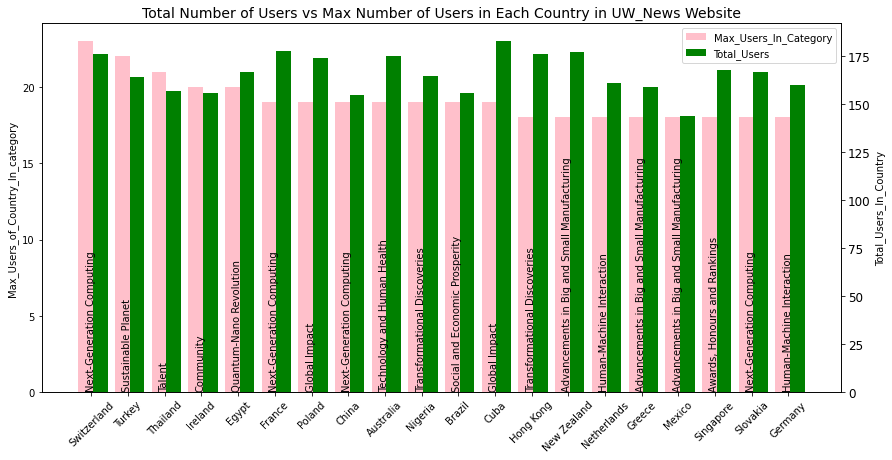

End


In [94]:
import matplotlib.pyplot as plt
import pandas as pd
import mariadb
import sys
import time
import numpy as np


def mariadb_select_all():
    # Connect to MariaDB Platform
    try:
        conn = mariadb.connect(
            user="drupal",
            password="drupal",
            host="172.18.0.7",
            port=3306,
            database="drupal"
        )
    except mariadb.Error as e:
        print(f"Error connecting to MariaDB Platform: {e}")
        sys.exit(1)

    time.sleep(10)
    cursor = conn.cursor()
    sql = """ SELECT countries, SUM(user) AS total_user_in_country, category_label AS category_with_max_user, MAX(user) AS max_user_for_category,t2.language
FROM(SELECT entity_id, delta, category_label, countries, COUNT(*) AS user
      FROM user__field_uw_news_categories 
      INNER JOIN user__field_countries 
      USING(entity_id,delta)
      GROUP BY category_label,countries
      ORDER BY user DESC)AS t1
LEFT JOIN (SELECT entity_id, delta, language FROM user__field_language) AS t2
USING (entity_id, delta)
GROUP BY countries
ORDER BY max_user_for_category DESC 
LIMIT 20;"""

    cursor.execute(sql)
    result = cursor.fetchall()

    df = pd.DataFrame(list(result),columns=["countries","total_user_in_country","category_with_max_user", "max_user_for_category","language"]) 
    x = df.max_user_for_category
    y = df.total_user_in_country
    z = df.countries
    w = df.category_with_max_user
    ind = np.arange(len(z))

    fig = plt.figure(figsize=(12.5,6.5), tight_layout=True) # Create matplotlib figure

    ax = fig.add_subplot(1,1,1) # Create matplotlib axes
    ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
    width = 0.4
    
    plt.title("Total Number of Users vs Max Number of Users in Each Country in UW_News Website", fontsize="14")
    s1= ax.bar(ind, x, width=width, color='pink', align='center')
    s2 = ax2.bar(ind+width, y, width=width, color='green', align='center')
    ax.set_ylabel('Max_Users_of_Country_In_category')
    ax2.set_ylabel('Total_Users_In_Country')
    plt.xticks(ind+width*width, z, rotation='vertical')
    plt.tick_params(axis='both',which='major',labelsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.legend( (s1[0], s2[0]),('Max_Users_In_Category','Total_Users'))
    for x,y in enumerate(w):
        plt.text(x,0.6,str(y),rotation='vertical',verticalalignment='bottom')

    plt.savefig('test3.png')
   
    plt.show()

print("Start")

mariadb_select_all()

print("End")


Start


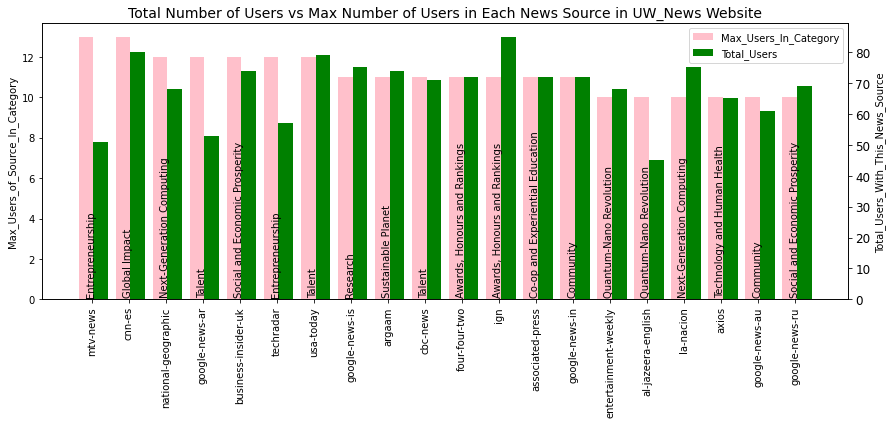

End


In [91]:
import matplotlib.pyplot as plt
import pandas as pd
import mariadb
import sys
import time
import numpy as np


def mariadb_select_all():
    # Connect to MariaDB Platform
    try:
        conn = mariadb.connect(
            user="drupal",
            password="drupal",
            host="172.18.0.7",
            port=3306,
            database="drupal"
        )
    except mariadb.Error as e:
        print(f"Error connecting to MariaDB Platform: {e}")
        sys.exit(1)

    time.sleep(10)
    cursor = conn.cursor()
    sql = """ SELECT news_sources, SUM(user) AS total_user_with_this_source, category_label AS category_with_max_user, MAX(user)AS max_user_for_category, t2.countries
FROM (SELECT entity_id, delta, category_label, field_sources_value AS news_sources, COUNT(*) AS user
      FROM user__field_uw_news_categories 
      INNER JOIN user__field_sources
      USING(entity_id,delta)
      GROUP BY category_label,field_sources_value
      ORDER BY user DESC)AS t1
INNER JOIN (SELECT entity_id, delta, countries FROM user__field_countries) AS t2
USING(entity_id, delta)
GROUP BY news_sources
ORDER BY max_user_for_category DESC
LIMIT 20;"""

    cursor.execute(sql)
    result = cursor.fetchall()

    df = pd.DataFrame(list(result),columns=["news_sources","total_user_with_this_source","category_with_max_user", "max_user_for_category", "countries"]) 
    x = df.max_user_for_category
    y = df.total_user_with_this_source
    z = df.news_sources
    w = df.category_with_max_user
    ind = np.arange(len(z))

    fig = plt.figure(figsize=(12.5,6), tight_layout=True) # Create matplotlib figure

    ax = fig.add_subplot(1,1,1) # Create matplotlib axes
    ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
    width = 0.4
    
    plt.title("Total Number of Users vs Max Number of Users in Each News Source in UW_News Website", fontsize="14")
    s1= ax.bar(ind, x, width=width, color='pink', align='center')
    s2 = ax2.bar(ind+width, y, width=width, color='green', align='center')
    ax.set_ylabel('Max_Users_of_Source_In_Category')
    ax2.set_ylabel('Total_Users_With_This_News_Source')
    plt.xticks(ind+width*width, z, rotation='vertical')
    plt.tick_params(axis='both',which='major',labelsize=12)
    ax.tick_params(axis='x', rotation=90)
    ax.legend( (s1[0], s2[0]),('Max_Users_In_Category','Total_Users'))
    for x,y in enumerate(w):
        plt.text(x,0.6,str(y),rotation='vertical',verticalalignment='bottom')
    plt.savefig('test4.png')
   
    plt.show()

print("Start")

mariadb_select_all()

print("End")


Start


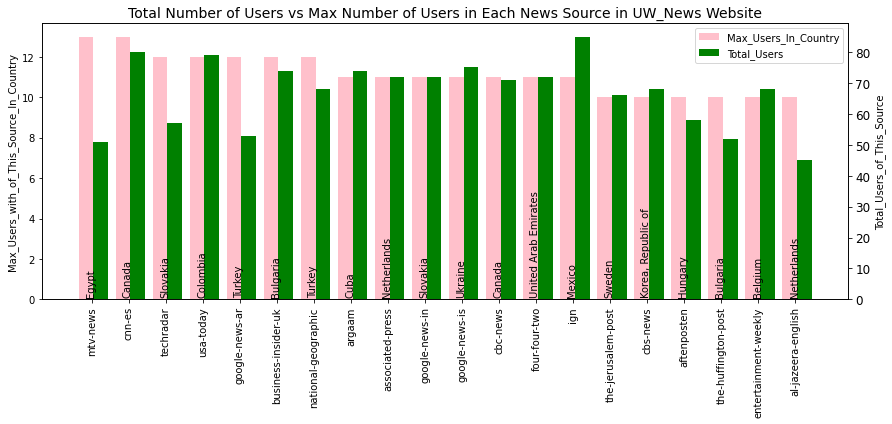

End


In [90]:
import matplotlib.pyplot as plt
import pandas as pd
import mariadb
import sys
import time
import numpy as np


def mariadb_select_all():
    # Connect to MariaDB Platform
    try:
        conn = mariadb.connect(
            user="drupal",
            password="drupal",
            host="172.18.0.7",
            port=3306,
            database="drupal"
        )
    except mariadb.Error as e:
        print(f"Error connecting to MariaDB Platform: {e}")
        sys.exit(1)

    time.sleep(10)
    cursor = conn.cursor()
    sql = """ SELECT news_sources, SUM(user) AS total_user_with_this_source, category_label AS category_with_max_user, MAX(user)AS max_user_for_category, t2.countries
FROM (SELECT entity_id, delta, category_label, field_sources_value AS news_sources, COUNT(*) AS user
      FROM user__field_uw_news_categories 
      INNER JOIN user__field_sources
      USING(entity_id,delta)
      GROUP BY category_label,field_sources_value
      ORDER BY user DESC)AS t1
INNER JOIN (SELECT entity_id, delta, countries FROM user__field_countries) AS t2
USING(entity_id, delta)
GROUP BY news_sources
ORDER BY max_user_for_category DESC
LIMIT 20;"""

    cursor.execute(sql)
    result = cursor.fetchall()

    df = pd.DataFrame(list(result),columns=["news_sources","total_user_with_this_source","category_with_max_user", "max_user_for_category", "countries"]) 
    x = df.max_user_for_category
    y = df.total_user_with_this_source
    z = df.news_sources
    w = df.countries
    ind = np.arange(len(z))

    fig = plt.figure(figsize=(12.5,6), tight_layout=True) # Create matplotlib figure

    ax = fig.add_subplot(1,1,1) # Create matplotlib axes
    ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
    width = 0.4
    
    plt.title("Total Number of Users vs Max Number of Users in Each News Source in UW_News Website", fontsize="14")
    s1= ax.bar(ind, x, width=width, color='pink', align='center')
    s2 = ax2.bar(ind+width, y, width=width, color='green', align='center')
    ax.set_ylabel('Max_Users_with_of_This_Source_In_Country')
    ax2.set_ylabel('Total_Users_of_This_Source')
    plt.xticks(ind+width*width, z, rotation='vertical')
    plt.tick_params(axis='both',which='major',labelsize=12)
    ax.tick_params(axis='x', rotation=90)
    ax.legend( (s1[0], s2[0]),('Max_Users_In_Country','Total_Users'))
    for x,y in enumerate(w):
        plt.text(x,0.6,str(y),rotation='vertical',verticalalignment='bottom')

    plt.savefig('test5.png')
   
    plt.show()

print("Start")

mariadb_select_all()

print("End")

Start


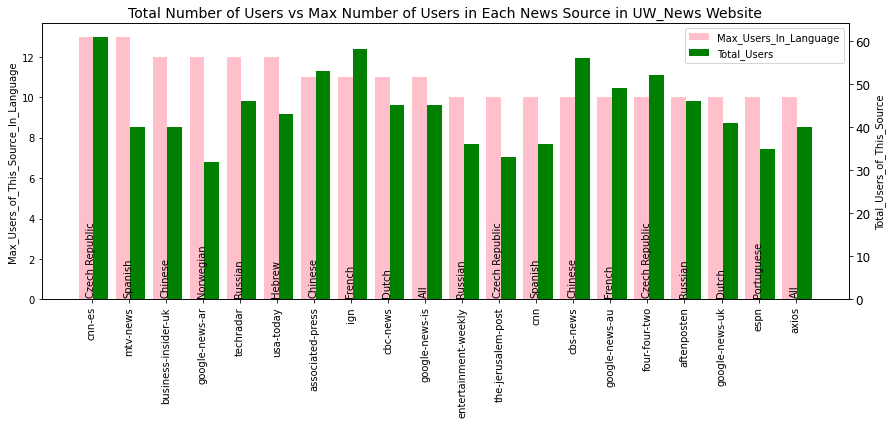

End


In [89]:
import matplotlib.pyplot as plt
import pandas as pd
import mariadb
import sys
import time
import numpy as np


def mariadb_select_all():
    # Connect to MariaDB Platform
    try:
        conn = mariadb.connect(
            user="drupal",
            password="drupal",
            host="172.18.0.7",
            port=3306,
            database="drupal"
        )
    except mariadb.Error as e:
        print(f"Error connecting to MariaDB Platform: {e}")
        sys.exit(1)

    time.sleep(10)
    cursor = conn.cursor()
    sql = """ SELECT news_sources, SUM(user) AS total_user_with_this_source, category_label AS category_with_max_user, MAX(user)AS max_user_for_category, t2.language
FROM (SELECT entity_id, delta, category_label, field_sources_value AS news_sources, COUNT(*) AS user
      FROM user__field_uw_news_categories 
      INNER JOIN user__field_sources
      USING(entity_id,delta)
      GROUP BY category_label,field_sources_value
      ORDER BY user DESC)AS t1
INNER JOIN (SELECT entity_id, delta, language FROM user__field_language) AS t2
USING(entity_id, delta)
GROUP BY news_sources
ORDER BY max_user_for_category DESC
LIMIT 20;"""

    cursor.execute(sql)
    result = cursor.fetchall()

    df = pd.DataFrame(list(result),columns=["news_sources","total_user_with_this_source","category_with_max_user", "max_user_for_category", "language"]) 
    x = df.max_user_for_category
    y = df.total_user_with_this_source
    z = df.news_sources
    w = df.language
    ind = np.arange(len(z))

    fig = plt.figure(figsize=(12.5,6), tight_layout=True) # Create matplotlib figure

    ax = fig.add_subplot(1,1,1) # Create matplotlib axes
    ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
    width = 0.4
    
    plt.title("Total Number of Users vs Max Number of Users in Each News Source in UW_News Website", fontsize="14")
    s1= ax.bar(ind, x, width=width, color='pink', align='center')
    s2 = ax2.bar(ind+width, y, width=width, color='green', align='center')
    ax.set_ylabel('Max_Users_of_This_Source_In_Language')
    ax2.set_ylabel('Total_Users_of_This_Source')
    plt.xticks(ind+width*width, z, rotation='vertical')
    plt.tick_params(axis='both',which='major',labelsize=12)
    ax.tick_params(axis='x', rotation=90)
    ax.legend( (s1[0], s2[0]),('Max_Users_In_Language','Total_Users'))
    for x,y in enumerate(w):
        plt.text(x,0.6,str(y),rotation='vertical',verticalalignment='bottom')

    plt.savefig('test6.png')
   
    plt.show()

print("Start")

mariadb_select_all()

print("End")

Start


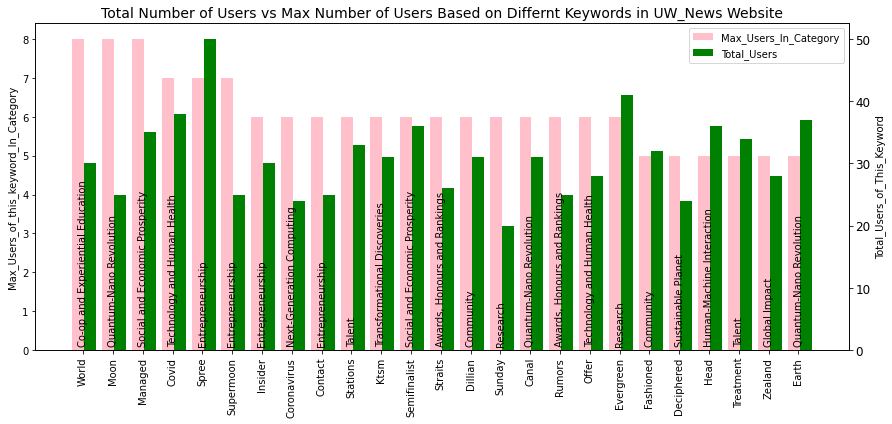

End


In [82]:
import matplotlib.pyplot as plt
import pandas as pd
import mariadb
import sys
import time
import numpy as np


def mariadb_select_all():
    # Connect to MariaDB Platform
    try:
        conn = mariadb.connect(
            user="drupal",
            password="drupal",
            host="172.18.0.7",
            port=3306,
            database="drupal"
        )
    except mariadb.Error as e:
        print(f"Error connecting to MariaDB Platform: {e}")
        sys.exit(1)

    time.sleep(10)
    cursor = conn.cursor()
    sql = """ SELECT news_keywords, SUM(user)AS total_user_with_this_keyword, category_label AS category_with_max_user, MAX(user)AS max_user_for_category,t2.countries
FROM (SELECT entity_id, delta, category_label, field_keywords_value AS news_keywords, COUNT(*) AS user
      FROM user__field_uw_news_categories 
      INNER JOIN user__field_keywords
      USING(entity_id,delta)
      GROUP BY category_label,field_keywords_value
      ORDER BY user DESC)AS t1
INNER JOIN (SELECT entity_id, delta, countries FROM user__field_countries) AS t2
USING(entity_id,delta)
GROUP BY news_keywords  
ORDER BY max_user_for_category  DESC
LIMIT 25;"""

    cursor.execute(sql)
    result = cursor.fetchall()

    df = pd.DataFrame(list(result),columns=["news_keywords","total_user_with_this_keyword","category_with_max_user", "max_user_for_category","countries"]) 
    x = df.max_user_for_category
    y = df.total_user_with_this_keyword
    z = df.news_keywords
    w = df.category_with_max_user
    ind = np.arange(len(z))

    fig = plt.figure(figsize=(12.5,6), tight_layout=True) # Create matplotlib figure

    ax = fig.add_subplot(1,1,1) # Create matplotlib axes
    ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
    width = 0.4
    
    plt.title("Total Number of Users vs Max Number of Users Based on Differnt Keywords in UW_News Website", fontsize="14")
    s1= ax.bar(ind, x, width=width, color='pink', align='center')
    s2 = ax2.bar(ind+width, y, width=width, color='green', align='center')
    ax.set_ylabel('Max_Users_of_this_keyword_In_Category')
    ax2.set_ylabel('Total_Users_of_This_Keyword')
    plt.xticks(ind+width*width, z, rotation='vertical')
    plt.tick_params(axis='both',which='major',labelsize=12)
    ax.tick_params(axis='x', rotation=90)
    ax.legend( (s1[0], s2[0]),('Max_Users_In_Category','Total_Users'))
    for x,y in enumerate(w):
        plt.text(x,0.6,str(y),rotation='vertical', verticalalignment= 'bottom')

    plt.savefig('test7.png')
   
    plt.show()

print("Start")

mariadb_select_all()

print("End")


Start


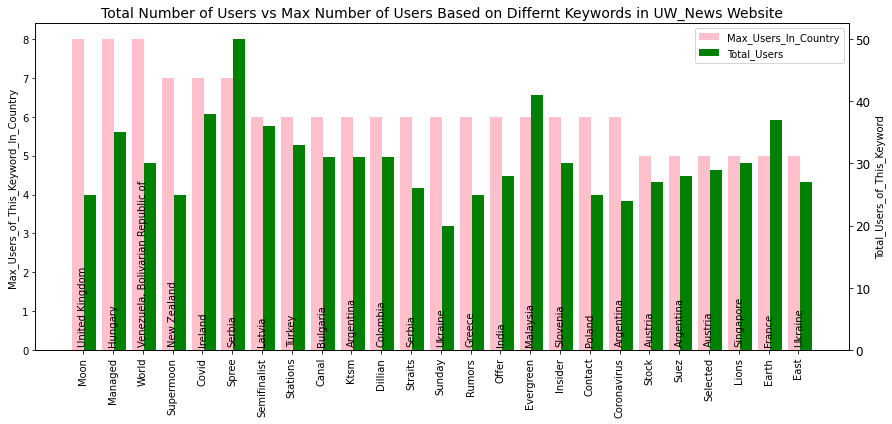

End


In [85]:
import matplotlib.pyplot as plt
import pandas as pd
import mariadb
import sys
import time
import numpy as np


def mariadb_select_all():
    # Connect to MariaDB Platform
    try:
        conn = mariadb.connect(
            user="drupal",
            password="drupal",
            host="172.18.0.7",
            port=3306,
            database="drupal"
        )
    except mariadb.Error as e:
        print(f"Error connecting to MariaDB Platform: {e}")
        sys.exit(1)

    time.sleep(10)
    cursor = conn.cursor()
    sql = """ SELECT news_keywords, SUM(user)AS total_user_with_this_keyword, category_label AS category_with_max_user, MAX(user)AS max_user_for_category,t2.countries
FROM (SELECT entity_id, delta, category_label, field_keywords_value AS news_keywords, COUNT(*) AS user
      FROM user__field_uw_news_categories 
      INNER JOIN user__field_keywords
      USING(entity_id,delta)
      GROUP BY category_label,field_keywords_value
      ORDER BY user DESC)AS t1
INNER JOIN (SELECT entity_id, delta, countries FROM user__field_countries) AS t2
USING(entity_id,delta)
GROUP BY news_keywords  
ORDER BY max_user_for_category  DESC
LIMIT 25;"""

    cursor.execute(sql)
    result = cursor.fetchall()

    df = pd.DataFrame(list(result),columns=["news_keywords","total_user_with_this_keyword","category_with_max_user", "max_user_for_category","countries"]) 
    x = df.max_user_for_category
    y = df.total_user_with_this_keyword
    z = df.news_keywords
    w = df.countries
    ind = np.arange(len(z))

    fig = plt.figure(figsize=(12.5,6), tight_layout=True) # Create matplotlib figure

    ax = fig.add_subplot(1,1,1) # Create matplotlib axes
    ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
    width = 0.4
    
    plt.title("Total Number of Users vs Max Number of Users Based on Differnt Keywords in UW_News Website", fontsize="14")
    s1= ax.bar(ind, x, width=width, color='pink', align='center')
    s2 = ax2.bar(ind+width, y, width=width, color='green', align='center')
    ax.set_ylabel('Max_Users_of_This_Keyword_In_Country')
    ax2.set_ylabel('Total_Users_of_This_Keyword')
    plt.xticks(ind+width*width, z, rotation='vertical')
    plt.tick_params(axis='both',which='major',labelsize=12)
    ax.tick_params(axis='x', rotation=90)
    ax.legend( (s1[0], s2[0]),('Max_Users_In_Country','Total_Users'))
    for x,y in enumerate(w):
        plt.text(x,0.6,str(y),rotation='vertical', verticalalignment= 'bottom')
    
    plt.savefig('test8.png')
   
    plt.show()

print("Start")

mariadb_select_all()

print("End")
